In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [8]:
df = pd.read_csv('../data/raw/steam.csv')

In [9]:
df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

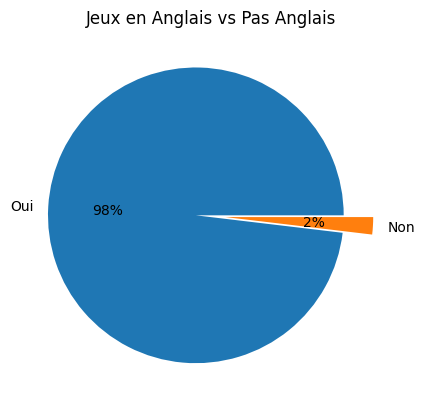

In [35]:
english = list(df.english.value_counts(normalize=True))
labels_english = ["Oui","Non"]

plt.pie(english, labels= labels_english, autopct='%.0f%%', explode =(0.1,0.1))
plt.title("Jeux en Anglais vs Pas Anglais")
plt.show()

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_11784\443792428.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




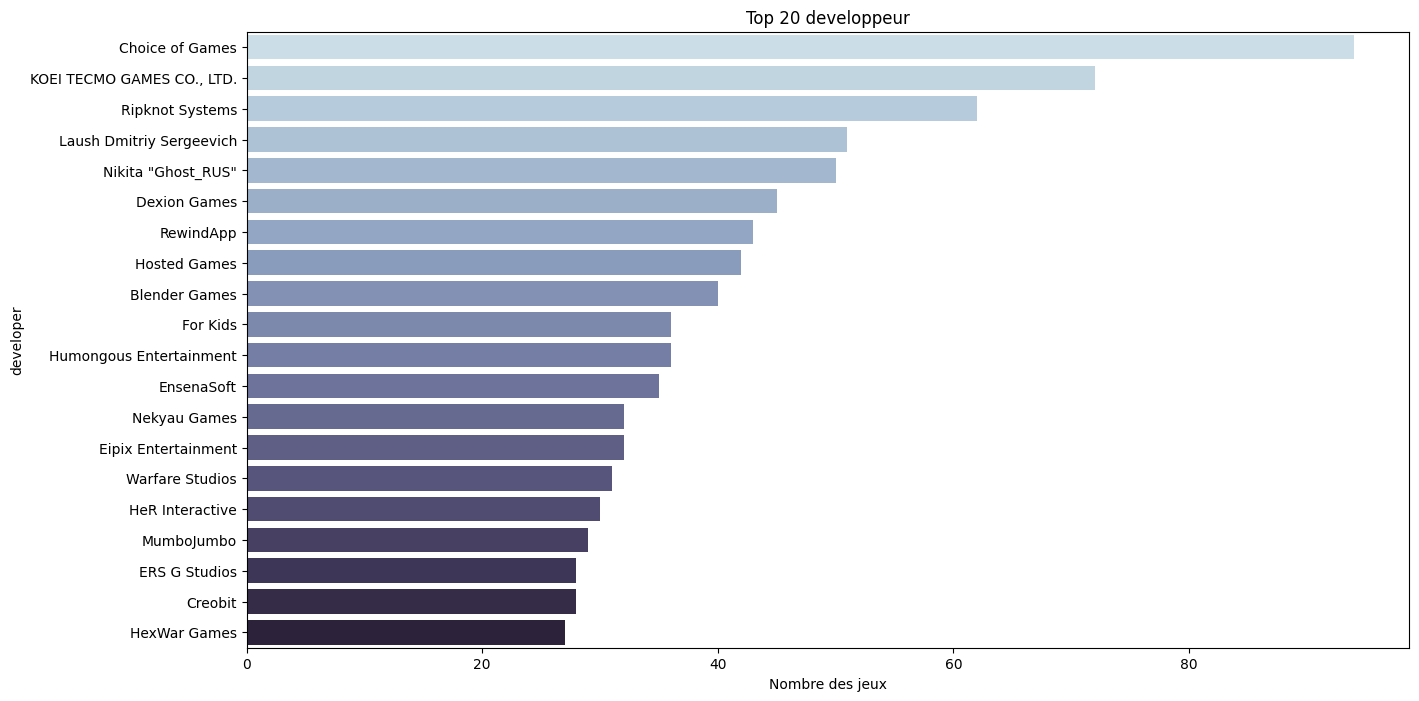

In [34]:
df_developer_top20 = pd.DataFrame(df.developer.value_counts().head(20)).reset_index()
df_developer_top20.columns=['developer','Num_of_games']

plt.figure(figsize=(15, 8))
bp_top20_dev = sns.barplot(y='developer', x='Num_of_games', data=df_developer_top20, palette="ch:s=.25,rot=-.25")
bp_top20_dev.set_xlabel('Nombre des jeux')
plt.title('Top 20 developpeur')
plt.show()

In [24]:
def flat_list_to_dict(col):
    col_list=col.values.tolist()
    new_list=[item.split(";") for item in col_list]
    new_col_list=[item for list_in_new_list in new_list for item in list_in_new_list]
    col_dict={i:new_col_list.count(i) for i in set(new_col_list)}
    return {i[0]:i[1] for i in sorted(col_dict.items(), key=lambda item: item[1], reverse=True)}

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_11784\1208863971.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




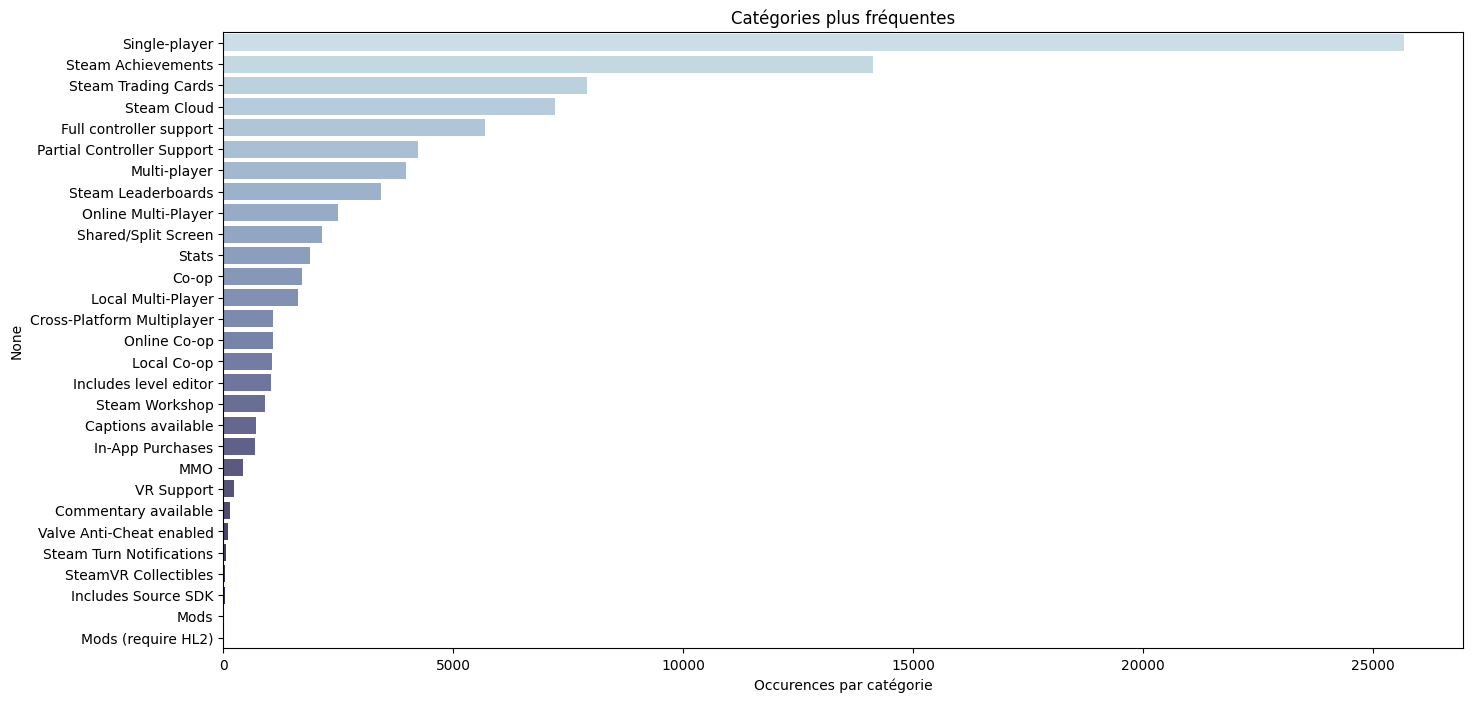

In [33]:
cat_dict=flat_list_to_dict(df.categories)
plt.figure(figsize=(16,8))
most_frequent_cat=pd.DataFrame.from_dict(cat_dict,orient='index', columns=['Fréquence'])
bp_cat = sns.barplot(x='Fréquence', y=most_frequent_cat.index, data=most_frequent_cat, palette="ch:s=.25,rot=-.25")
bp_cat.set_xlabel('Occurences par catégorie')
plt.title("Catégories plus fréquentes")
plt.show()

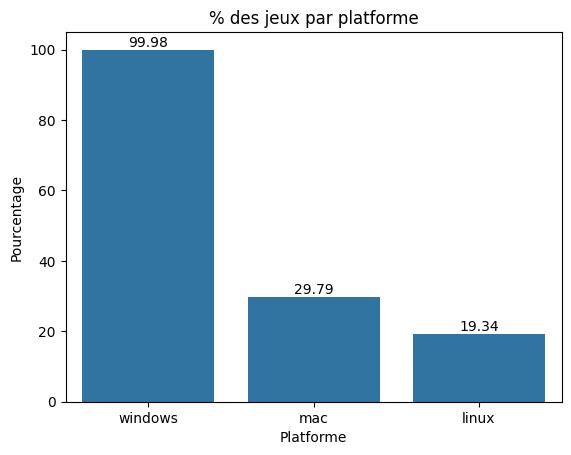

In [32]:
dict_platform=flat_list_to_dict(df.platforms)
df_platform=pd.DataFrame.from_dict(dict_platform, orient='index').reset_index()
df_platform.columns=['Platforme', 'num_of_games']
df_platform['Pourcentage']=(df_platform.num_of_games/df.shape[0]*100).apply(lambda x :round(x,4))
ax = sns.barplot(x='Platforme', y='Pourcentage', data=df_platform)
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.title("% des jeux par platforme")
plt.draw()

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_11784\2667267113.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




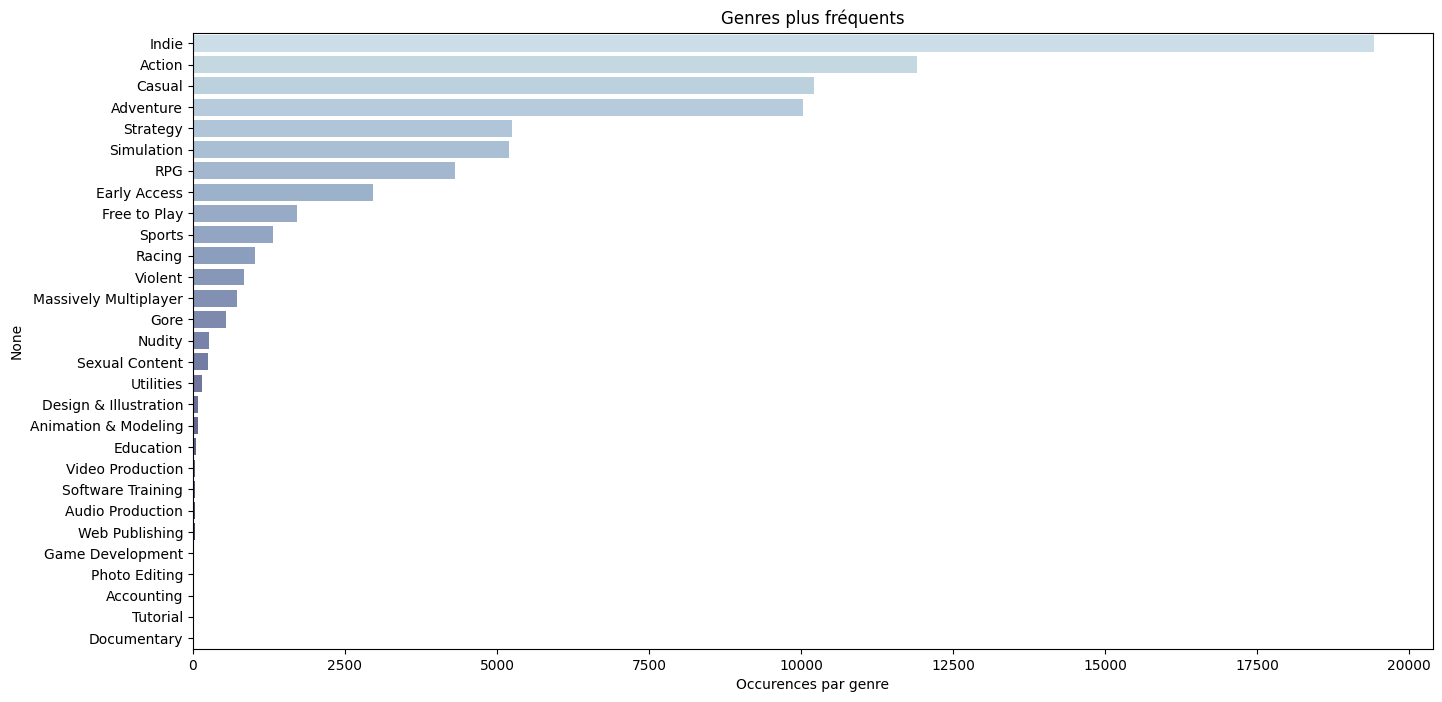

In [29]:
genres_dict=flat_list_to_dict(df.genres)
plt.figure(figsize=(16,8))
most_frequent_genre=pd.DataFrame.from_dict(genres_dict,orient='index', columns=['Fréquence'])
bp_genre = sns.barplot(x='Fréquence', y=most_frequent_genre.index, data=most_frequent_genre, palette="ch:s=.25,rot=-.25")
bp_genre.set_xlabel('Occurences par genre')
plt.title("Genres plus fréquents")
plt.show()

In [ ]:
from IPython.display import display, HTML

def display_game(row):
  html = ''
  html += f"<h1> {row['name']} </h1>"
  html += f"<strong> {row['genres']} </strong>"
  html += f"<p>{row['short_description']}</p>"
  html += f"<img src={row['header_image']} >"
  display(HTML(html))

for _, row in df.head().iterrows():
  display_game(row)

In [ ]:
game_name = "Half-Life: Opposing Force"
game_row = top_df[top_df['name'] == game_name]
distances = cosine_distances(np.array(game_row.embedding.tolist()), np.array(top_df.embedding.tolist()))[0]
sorted_indices = distances.argsort()
for idx in sorted_indices[:20]:
  similar_game = top_df.iloc[idx]
  display_game(similar_game)